In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## question
- How does customer age and gender influence their purchasing behavior?
- Which generation shops the most?
- Are there discernible patterns in sales across different time periods?
- Which product categories hold the highest appeal among customers?
- What are the relationships between age, spending, and product preferences?
- How do customers adapt their shopping habits during seasonal trends?
- Are there distinct purchasing behaviors based on the number of items bought per transaction?
- What insights can be gleaned from the distribution of product prices within each category?

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
df.describe(include="all")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,NaN,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,2023-07-03 00:25:55.200000256,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,NaN,NaN,64.00000,NaN,4.000000,500.000000,2000.000000


## Distribution of Numerical Values

<Figure size 1500x1000 with 0 Axes>

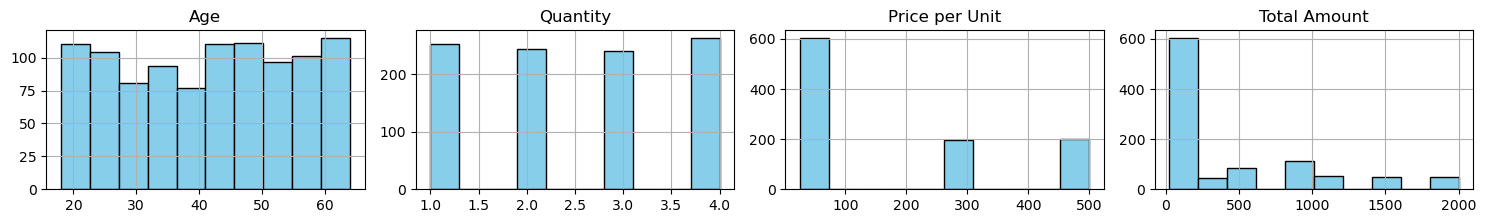

In [9]:
df_numerical = df.drop(columns=['Date', 'Transaction ID'])

plt.figure(figsize=(15,10))
df_numerical.hist(bins=10,figsize=(15,10),layout=(5,4),color="skyblue",edgecolor="black")
plt.tight_layout()
plt.show()

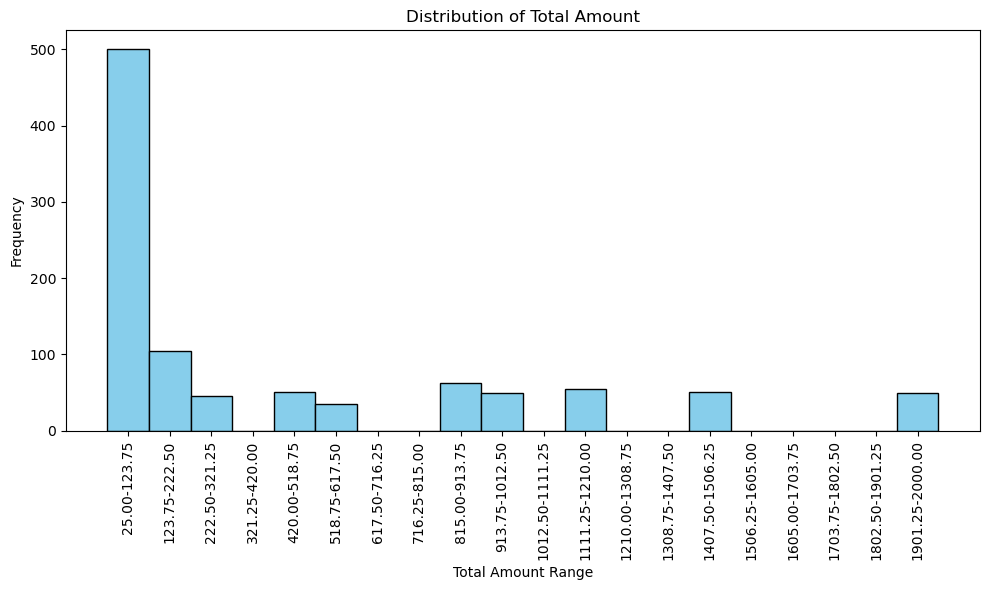

In [10]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df["Total Amount"], bins=20, color='skyblue', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, labels=[f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)], rotation=90)
plt.title("Distribution of Total Amount")
plt.xlabel("Total Amount Range")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

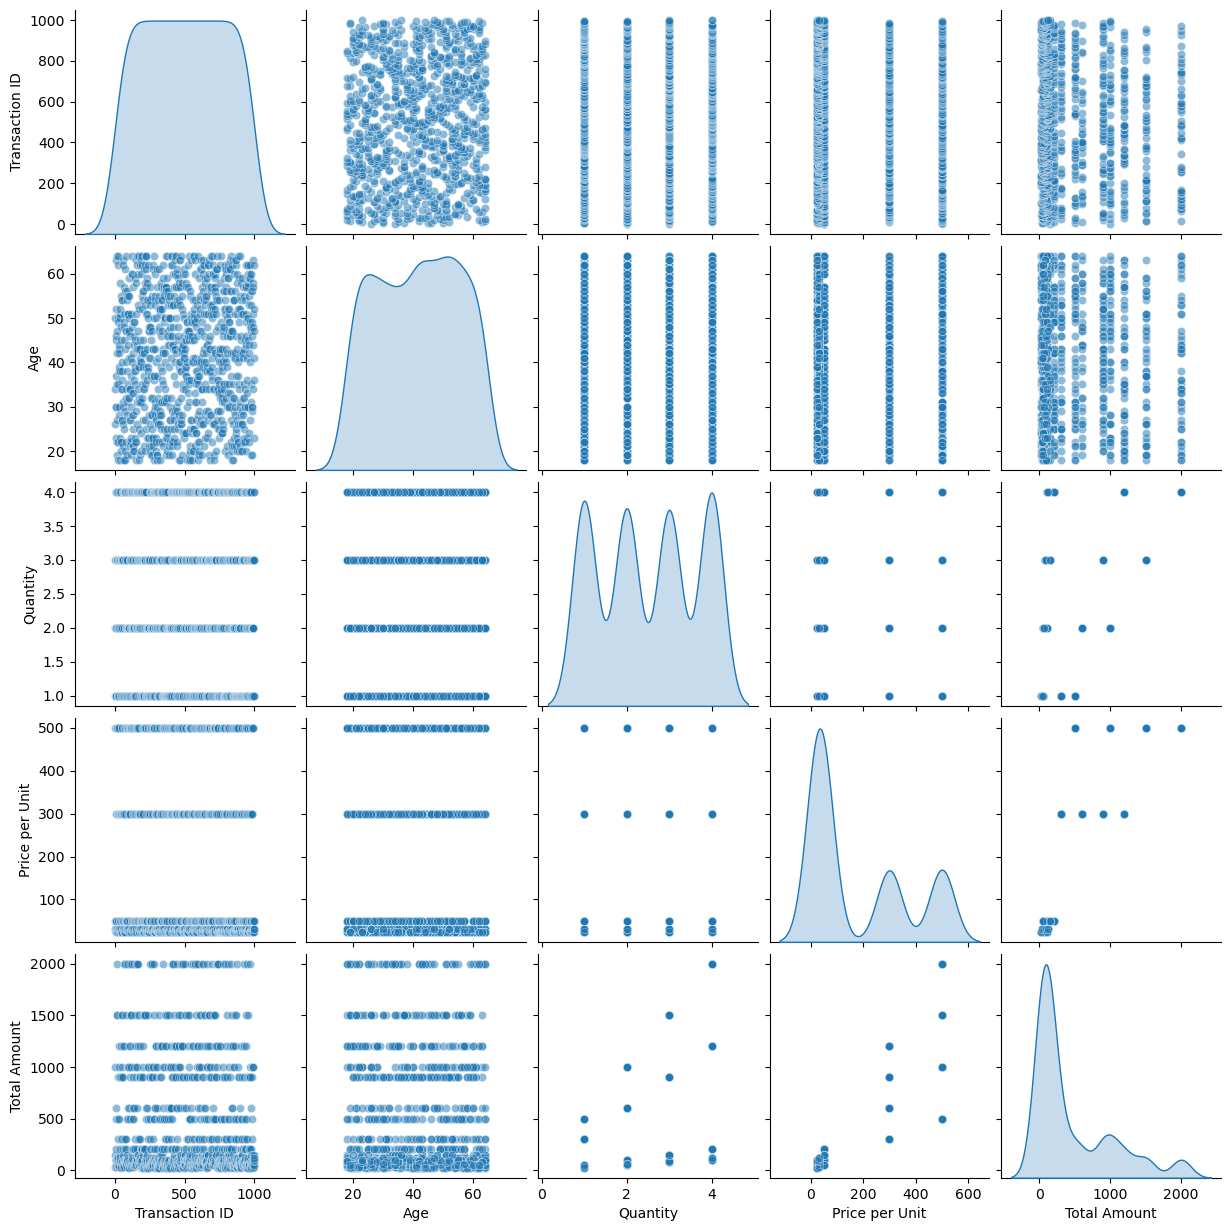

In [11]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

##### Based on the total spending data, it can be stated that the highest spending distribution among buyers falls within the range of 25 to 123.75.

## question
- How does generation and gender influence their purchasing behavior?
- What are the relationships between generation, spending, and product preferences?
- Which product categories hold the highest appeal among customers?

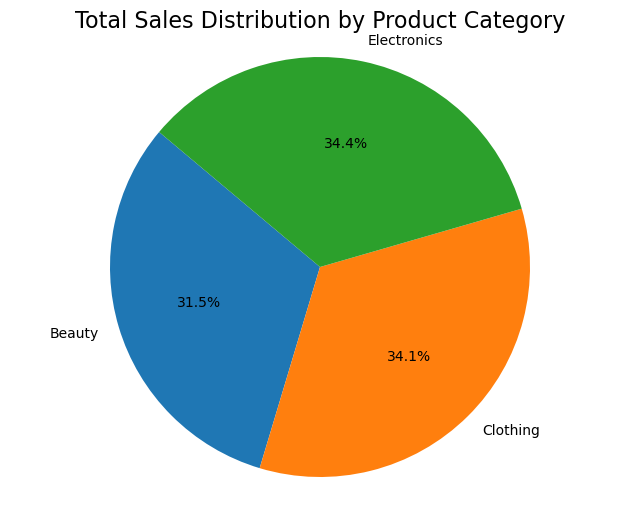

In [14]:
daily_sales_category = df.groupby(["Product Category","Date"]).agg({
    "Total Amount" : "sum",
    "Quantity" : "sum"
}).reset_index()
daily_sales_category
beauty_sales = daily_sales_category[daily_sales_category["Product Category"] == "Beauty"]
clothing_sales = daily_sales_category[daily_sales_category["Product Category"] == "Clothing"]
electronic_sales = daily_sales_category[daily_sales_category["Product Category"] == "Electronics"]
beauty_sales_total = beauty_sales["Total Amount"].sum()
clothing_sales_total = clothing_sales["Total Amount"].sum()
electronic_sales_total = electronic_sales["Total Amount"].sum()

data = {
    "Product Category": ["Beauty", "Clothing", "Electronics"],
    "Total Sales": [beauty_sales_total, clothing_sales_total, electronic_sales_total]
}

sales_summary_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.pie(sales_summary_df["Total Sales"],labels=sales_summary_df["Product Category"], autopct='%1.1f%%',startangle=140,)

plt.title("Total Sales Distribution by Product Category", fontsize=16)
plt.axis('equal')
plt.show()

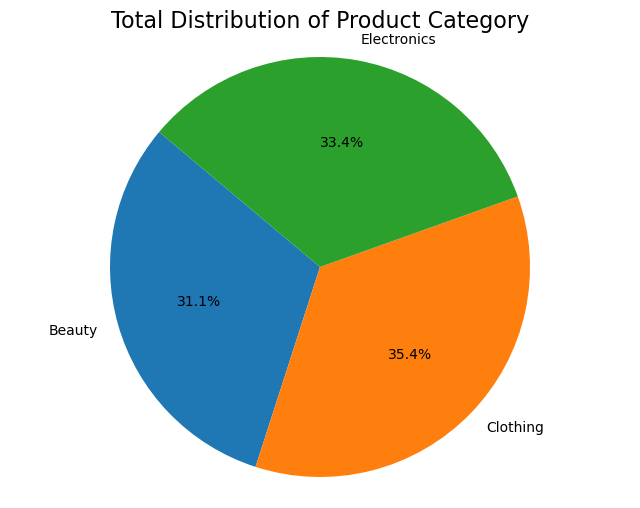

In [15]:
beauty_sales_total = beauty_sales["Total Amount"].value_counts().sum()
clothing_sales_total = clothing_sales["Total Amount"].value_counts().sum()
electronic_sales_total = electronic_sales["Total Amount"].value_counts().sum()
data = {
    "Product Category": ["Beauty", "Clothing", "Electronics"],
    "Total Sales": [beauty_sales_total, clothing_sales_total, electronic_sales_total]
}

sales_summary_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.pie(sales_summary_df["Total Sales"],labels=sales_summary_df["Product Category"], autopct='%1.1f%%',startangle=140,)

plt.title("Total Distribution of Product Category", fontsize=16)
plt.axis('equal')
plt.show()

In [16]:
bins = [11,26,42,58,68]
labels = ["Gen Z","Millenial","Gen X","Boomers"]

df["Generation Group"] = pd.cut(df["Age"],bins = bins,labels = labels,right=True)

/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_1913/2660163014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_generation = df.groupby("Generation Group")["Total Amount"].sum().reset_index()
/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_1913/2660163014.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_gender = df.groupby(["Generation Group","Gender"])["Total Amount"].sum().reset_index()
/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_1913/2660163014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True i

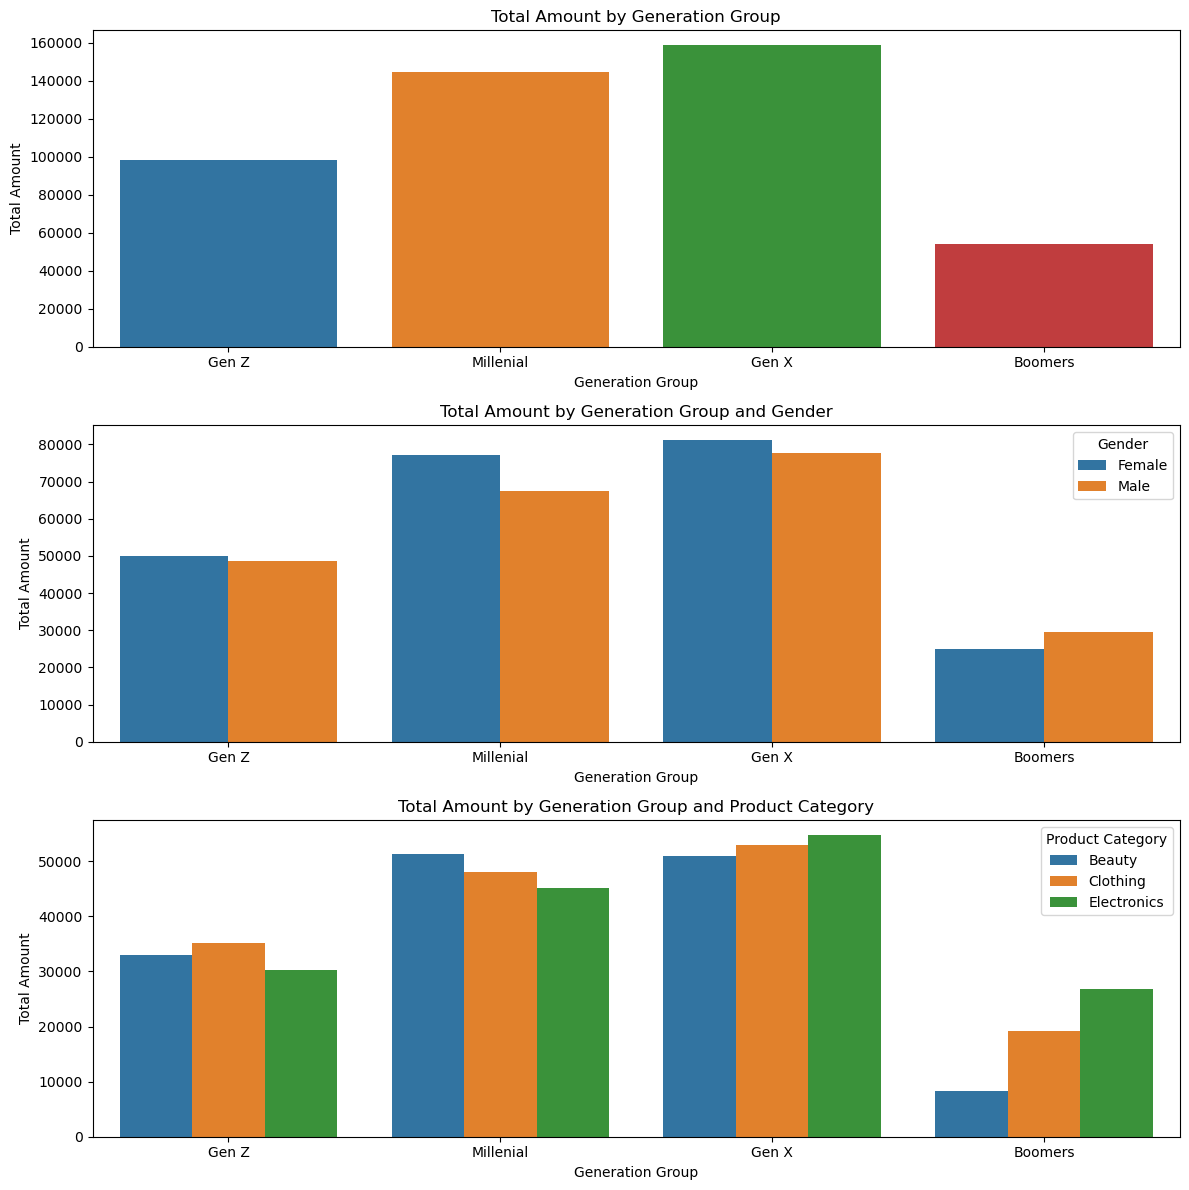

In [17]:
total_amount_generation = df.groupby("Generation Group")["Total Amount"].sum().reset_index()
total_amount_gender = df.groupby(["Generation Group","Gender"])["Total Amount"].sum().reset_index()
total_amount_category = df.groupby(["Generation Group","Product Category"])["Total Amount"].sum().reset_index()
plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)
plt.title("Total Amount by Generation Group")
sns.barplot(data=total_amount_generation, x="Generation Group", y="Total Amount", errorbar=None,hue="Generation Group")
plt.subplot(3,1,2)
plt.title("Total Amount by Generation Group and Gender")
sns.barplot(data=total_amount_gender, x="Generation Group", y="Total Amount", hue="Gender", errorbar=None)
plt.subplot(3,1,3)
plt.title("Total Amount by Generation Group and Product Category")
sns.barplot(data=total_amount_category, x="Generation Group", y="Total Amount", hue="Product Category", errorbar=None)
plt.tight_layout()
plt.show()

##### Generation X is the highest spender, closely followed by Millennials and then Generation Z. Meanwhile, Boomers contribute less to the overall spending. Total spending is fairly evenly distzributed among various generations for certain product categories. Generation X has the highest total spending in electronics, Millennials in beauty products, and Generation Z in clothing, with spending distribution by category not differing significantly from that of Boomers. However, the Boomer generation shows a lower contribution to product spending compared to other generations, likely due to differences in preferences and shopping habits, as Boomers tend to prefer electronic products followed by over beauty product.

## Which generation shops the most?

/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_1913/505222392.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shops_amount = df.groupby(["Generation Group","Gender"])["Transaction ID"].count().reset_index()


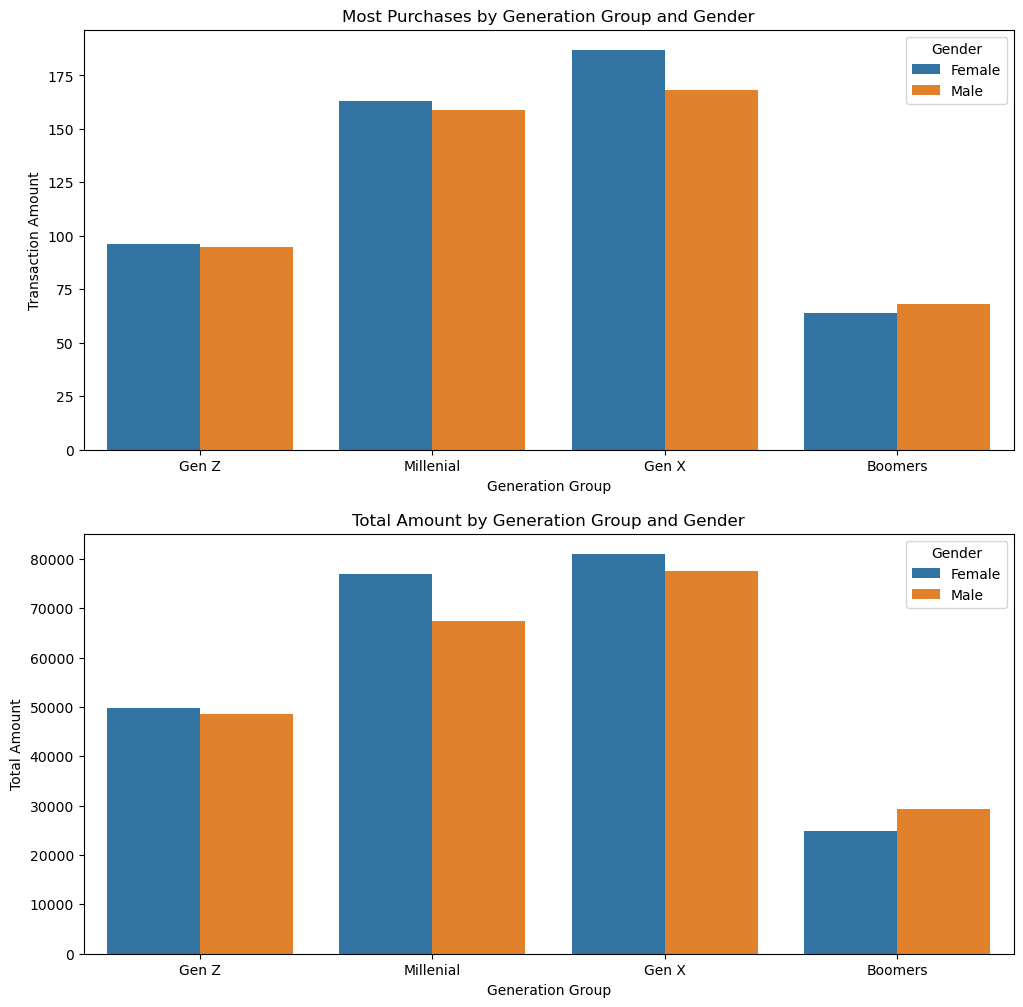

In [20]:
shops_amount = df.groupby(["Generation Group","Gender"])["Transaction ID"].count().reset_index()
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(data = shops_amount,x="Generation Group",y="Transaction ID",hue="Gender")
plt.title("Most Purchases by Generation Group and Gender")
plt.ylabel("Transaction Amount")
plt.subplot(2,1,2)
plt.title("Total Amount by Generation Group and Gender")
sns.barplot(data=total_amount_gender, x="Generation Group", y="Total Amount", hue="Gender", errorbar=None)
plt.show()

##### From the data, it can be concluded that Gen X and Millenial women have the highest shopping frequency, followed by Millennial women. Additionally, Gen X men also spend more money in their shopping frequency. This indicates that while Gen X women shop most frequently, men from that generation tend to make purchases of higher value,and Boomers man highest spending than the Boomers women.

## Are there discernible patterns in sales across different time periods?

In [23]:
monthly_sales = df.groupby(["Date"]).agg({
    "Quantity": 'sum',
    "Total Amount": 'sum'
}).reset_index()
monthly_sales = monthly_sales[monthly_sales['Total Amount'] > 0]
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Date']).dt.to_period('M')

In [24]:
monthly_grouped = monthly_sales.groupby(['Date']).agg({
    'Quantity': 'sum',
    'Total Amount': 'sum'
}).reset_index()
monthly_grouped

,Date,Quantity,Total Amount
0,2023-01,195,35450
1,2023-02,214,44060
2,2023-03,194,28990
3,2023-04,214,33870
4,2023-05,259,53150
5,2023-06,197,36715
6,2023-07,176,35465
7,2023-08,227,36960
8,2023-09,170,23620
9,2023-10,252,46580


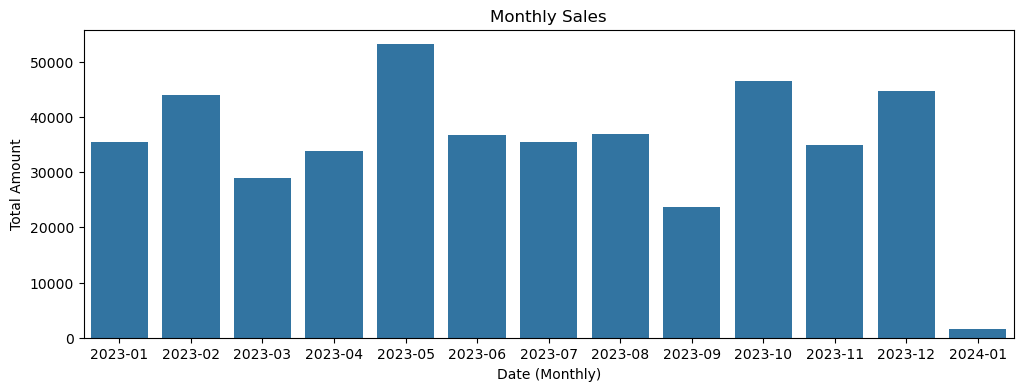

In [25]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_grouped,x="Date",y="Total Amount",errorbar=None)
plt.xlabel("Date (Monthly)")
plt.title("Monthly Sales")
plt.show()

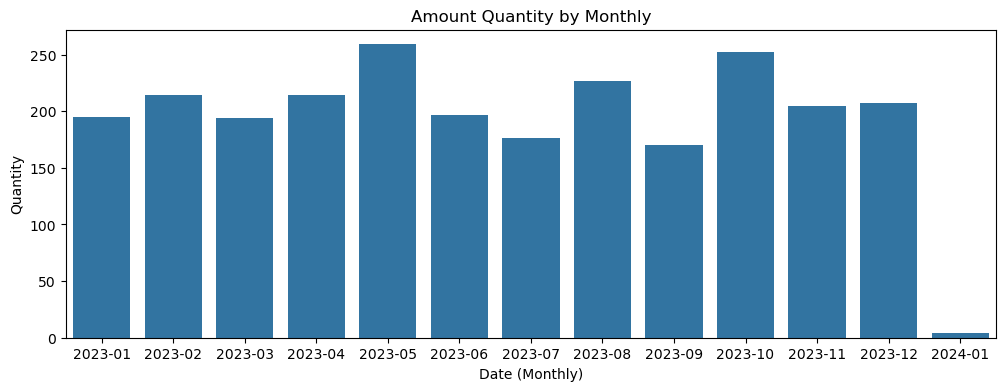

In [26]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_grouped,x="Date",y="Quantity",errorbar=None)
plt.xlabel("Date (Monthly)")
plt.title("Amount Quantity by Monthly")
plt.show()

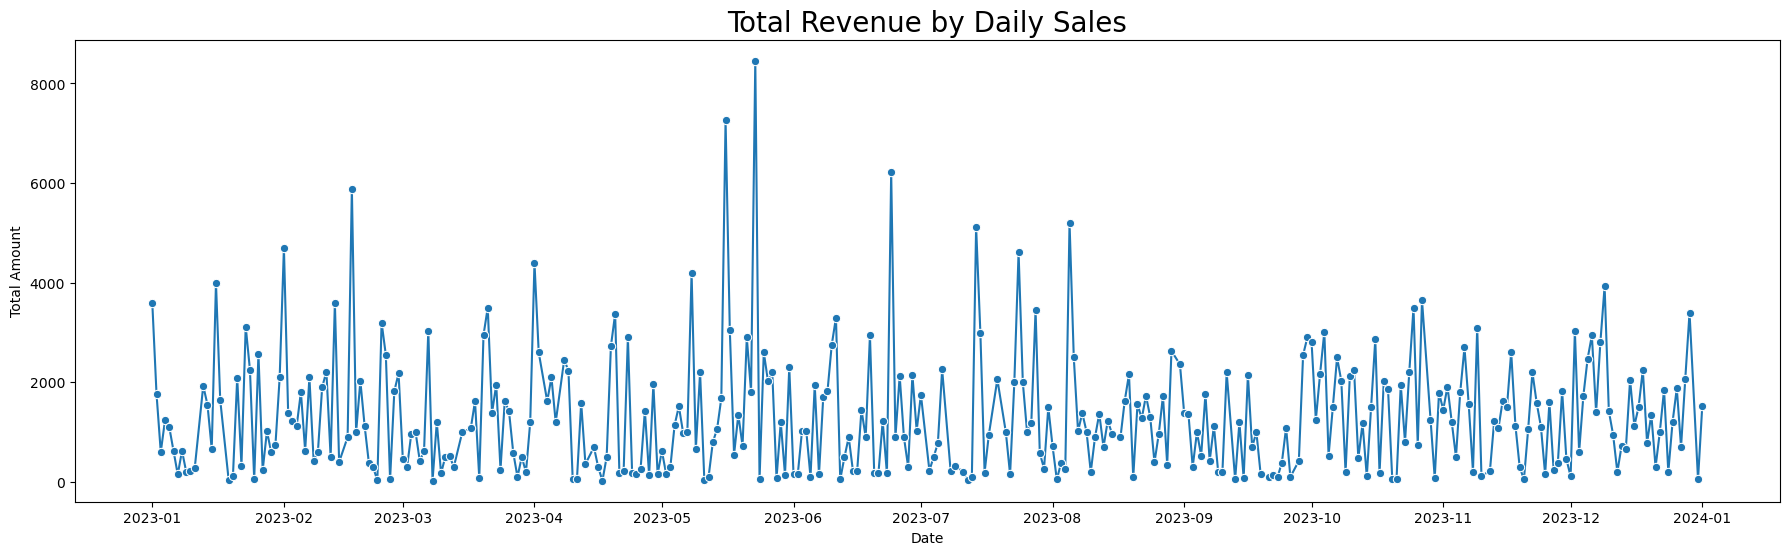

In [27]:
daily_sales = df.groupby("Date")["Total Amount"].sum().reset_index()
plt.figure(figsize=(22,6))
sns.lineplot(data=daily_sales, x='Date', y='Total Amount', errorbar=None, marker="o")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
plt.title("Total Revenue by Daily Sales",fontsize=20)
plt.show()

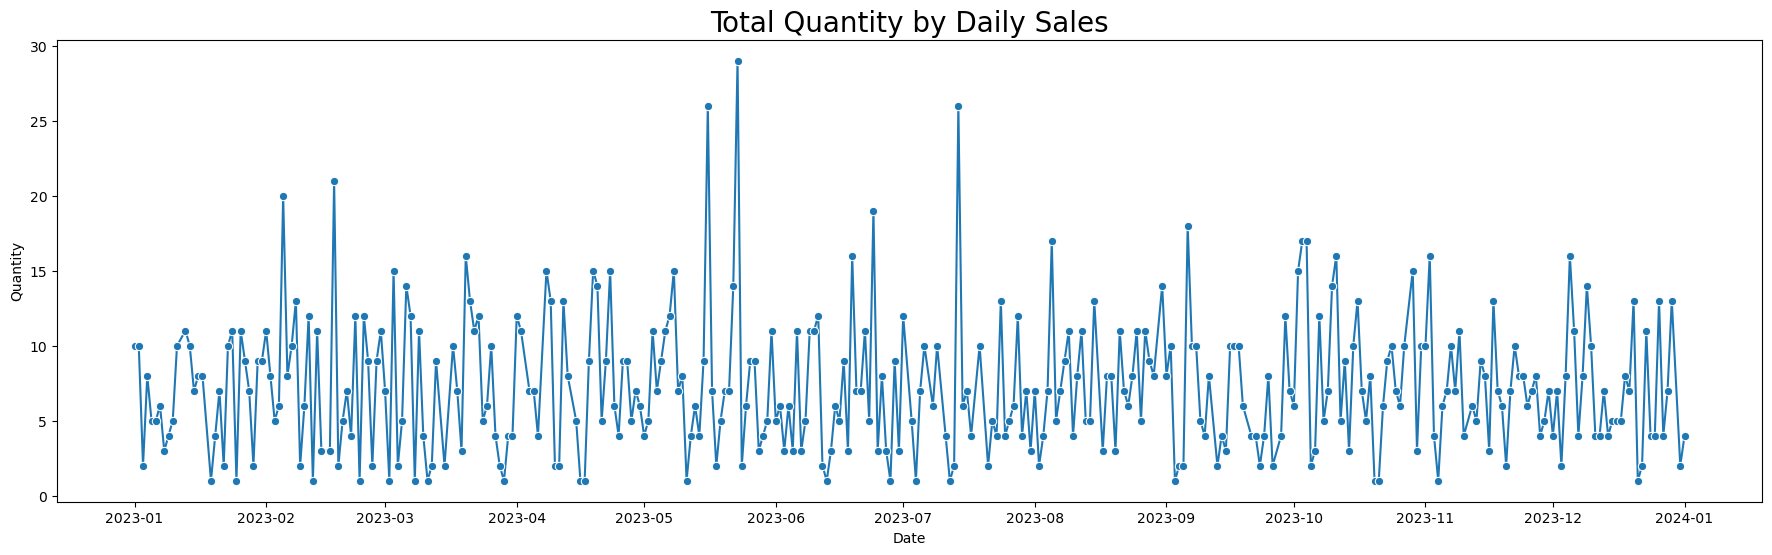

In [28]:
daily_quantity = df.groupby("Date")["Quantity"].sum().reset_index()
plt.figure(figsize=(22,6))
sns.lineplot(data=daily_quantity, x='Date', y='Quantity', errorbar=None, marker="o")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("Total Quantity by Daily Sales",fontsize=20)
plt.show()

#### Insight
From the data, it can be concluded that there was a spike in purchases in May, followed by smaller increases in September and December, where the number of purchases wasn’t very high, but the total spending was significant. In contrast, March and April saw high quantities of purchases, but the total revenue was not as substantial. This suggests that during those months, customers were buying cheaper items in larger quantities.


## Are there discernible patterns in sales across different product category

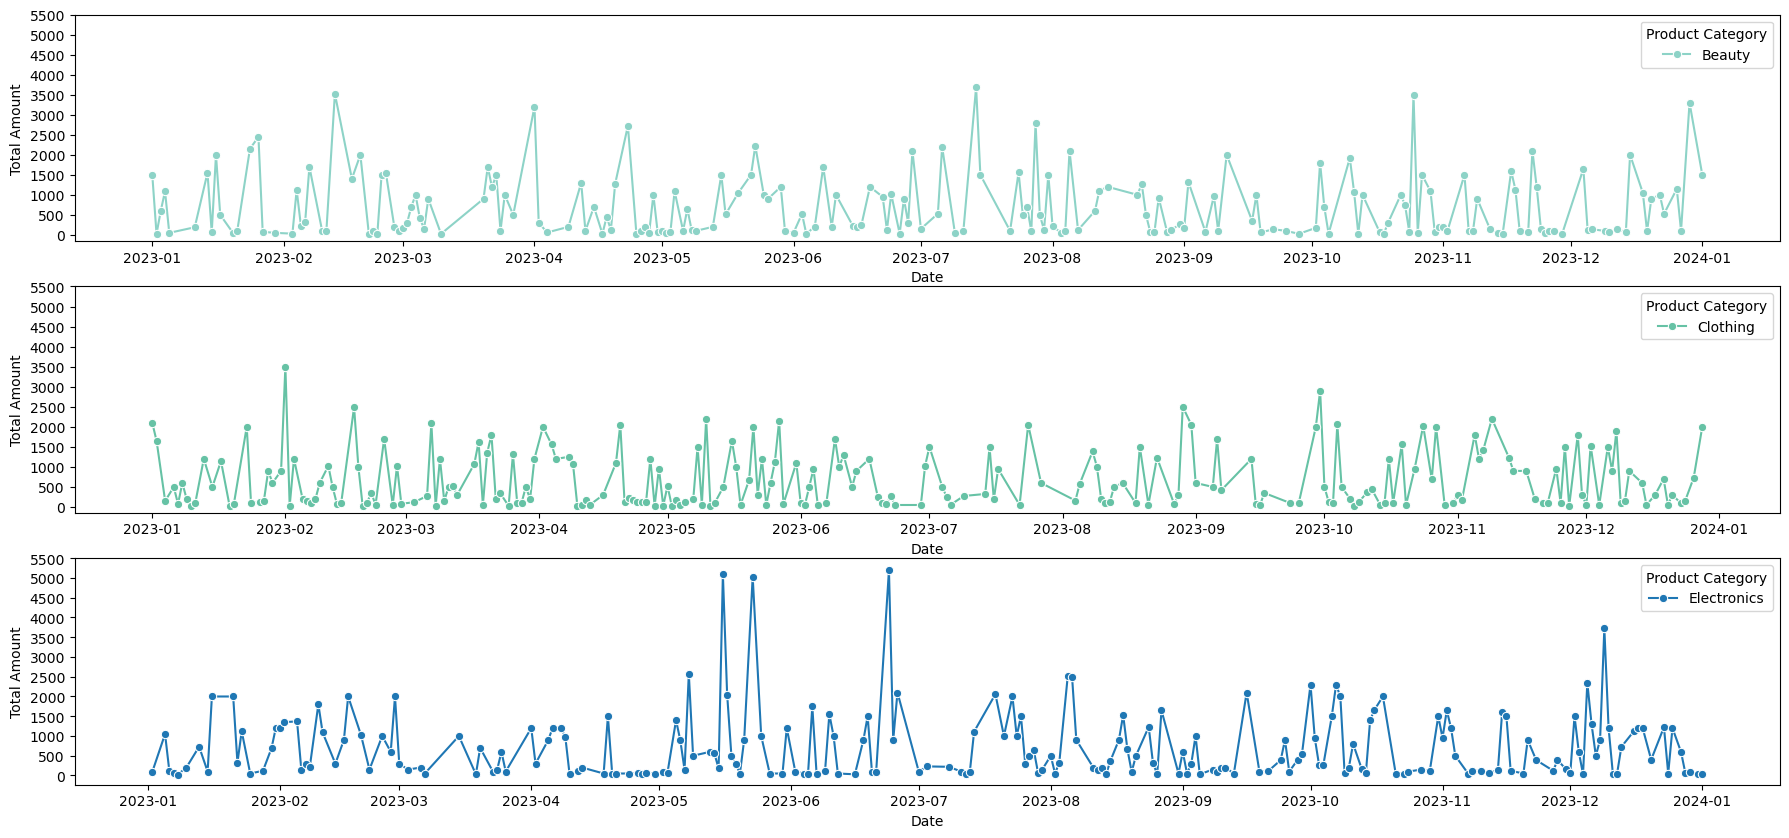

In [31]:
plt.figure(figsize=(22,10))
y_ticks = range(0, int(beauty_sales["Total Amount"].max()) + 2000, 500)
plt.subplot(3,1,1)
sns.lineplot(data=beauty_sales,x="Date",y="Total Amount",marker="o",errorbar=None,hue="Product Category",palette="Set3")
plt.yticks(y_ticks)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
plt.subplot(3,1,2)
sns.lineplot(data=clothing_sales,x="Date",y="Total Amount",marker="o",errorbar=None,hue="Product Category",palette="Set2")
plt.yticks(y_ticks)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
plt.subplot(3,1,3)
sns.lineplot(data=electronic_sales,x="Date",y="Total Amount",marker="o",errorbar=None,hue="Product Category")
plt.yticks(y_ticks)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 

#### Insight
In April, many products experienced a decline in revenue, with electronic products being the most affected. However, in May, electronic products saw a significant surge in sales, recovering from the previous month's downturn.


## CONCLUSION
Conclusion:
From the analysis of spending data across generations, several key insights can be drawn:

- Spending Distribution:
The majority of spending falls within the range of 25 to 123.75 units of currency.
Generation X emerges as the highest spender, followed closely by Millennials and then Generation Z. Boomers, on the other hand, contribute less to overall spending, likely due to different preferences and shopping habits.
- Generational Preferences:
Generation X spends the most on electronics, Millennials dominate in beauty products, and Generation Z leads in clothing purchases. The spending distribution by category is relatively consistent across generations, though Boomers show a marked preference for electronics and beauty products, albeit at lower spending levels than other generations.
- Gender-based Spending:
Women from Generation X and Millennials shop most frequently, with Generation X women leading in frequency. However, Generation X men tend to make fewer but higher-value purchases. Among Boomers, men spend more than women, particularly in high-value categories.
- Seasonal Trends:
There was a notable spike in spending in May, with smaller increases in September and December, where the total spending was high despite fewer purchases. In contrast, March and April saw higher purchase quantities, but revenue was lower, suggesting that cheaper items were purchased in bulk during those months.


Electronic products, which saw a decline in revenue in April, rebounded in May with a significant surge in sales.
In summary, Generation X leads in overall spending, with notable gender differences in shopping frequency and spending value. Seasonal trends reveal that while certain months see more frequent, lower-cost purchases, others like May experience fewer but higher-value transactions, particularly in electronics. Boomers' lower contribution may reflect distinct preferences and spending habits.